In [136]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/online-retail-dataset/online_retail_II.xlsx


In [137]:
'''Project: E-commerce Sales Analysis
You'll be analyzing sales data for an online retail store to help the company’s CEO and CMO understand customer behavior, product performance, and revenue trends.

Dataset:
📌 Kaggle - Online Retail Dataset

Task Breakdown:

1️⃣ Data Exploration & Cleaning
Load the dataset using pandas.
Check for missing values and handle them appropriately.
Remove duplicate records if any.
Convert data types where necessary (e.g., InvoiceDate to datetime).
Handle negative or zero values in Quantity and UnitPrice.

2️⃣ Exploratory Data Analysis (EDA)
Get summary statistics (.describe(), .info()).
Identify the top-selling products.
Find the most valuable customers based on total spending.
Analyze trends in sales over time (daily, monthly).

3️⃣ Data Visualization (Using Matplotlib / Seaborn / Power BI / Tableau)
Create a sales trend chart (time-series).
Generate a heatmap of sales by country.
Show customer segmentation (e.g., low, medium, high spenders).
Display the top product categories using a bar chart.

4️⃣ Business Insights & Recommendations
Which products generate the most revenue?
Are there seasonal trends in sales?
Which countries contribute the most to sales?
How can the company improve customer retention and revenue?

Expected Deliverables:
✅ A Jupyter Notebook with cleaned data, visualizations, and insights.
✅ A short report (Google Docs / PowerPoint) summarizing key findings and recommendations.
'''

"Project: E-commerce Sales Analysis\nYou'll be analyzing sales data for an online retail store to help the company’s CEO and CMO understand customer behavior, product performance, and revenue trends.\n\nDataset:\n📌 Kaggle - Online Retail Dataset\n\nTask Breakdown:\n\n1️⃣ Data Exploration & Cleaning\nLoad the dataset using pandas.\nCheck for missing values and handle them appropriately.\nRemove duplicate records if any.\nConvert data types where necessary (e.g., InvoiceDate to datetime).\nHandle negative or zero values in Quantity and UnitPrice.\n\n2️⃣ Exploratory Data Analysis (EDA)\nGet summary statistics (.describe(), .info()).\nIdentify the top-selling products.\nFind the most valuable customers based on total spending.\nAnalyze trends in sales over time (daily, monthly).\n\n3️⃣ Data Visualization (Using Matplotlib / Seaborn / Power BI / Tableau)\nCreate a sales trend chart (time-series).\nGenerate a heatmap of sales by country.\nShow customer segmentation (e.g., low, medium, high s

In [138]:
file_path = "/kaggle/input/online-retail-dataset/online_retail_II.xlsx"
sheet_names = ['Year 2009-2010', 'Year 2010-2011']
dfs = pd.read_excel(file_path, sheet_name=sheet_names)


In [139]:
dfs['Year 2009-2010'].head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


In [140]:
dfs['Year 2009-2010'].shape

(525461, 8)

In [142]:
df1=dfs['Year 2009-2010']

In [143]:
df1.isna().sum()

Invoice             0
StockCode           0
Description      2928
Quantity            0
InvoiceDate         0
Price               0
Customer ID    107927
Country             0
dtype: int64

In [144]:
df1=df1.dropna()

In [145]:
df1.isna().sum()

Invoice        0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
Price          0
Customer ID    0
Country        0
dtype: int64

In [146]:
df1.shape

(417534, 8)

In [147]:
df1.describe() #Now

,Quantity,InvoiceDate,Price,Customer ID
count,417534.000000,417534,417534.000000,417534.000000
mean,12.758815,2010-07-01 01:12:19.787610112,3.887547,15360.645478
min,-9360.000000,2009-12-01 07:45:00,0.000000,12346.000000
25%,2.000000,2010-03-26 11:26:00,1.250000,13983.000000
50%,4.000000,2010-07-08 19:12:00,1.950000,15311.000000
75%,12.000000,2010-10-14 14:08:00,3.750000,16799.000000
max,19152.000000,2010-12-09 20:01:00,25111.090000,18287.000000
std,101.220424,NaN,71.131797,1680.811316


In [149]:
df1.duplicated().sum()

6771

In [151]:
df1=df1.drop_duplicates()

In [152]:
df1.duplicated().sum()

0

In [153]:
df1.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


In [154]:
df1.shape

(410763, 8)

In [155]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 410763 entries, 0 to 525460
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      410763 non-null  object        
 1   StockCode    410763 non-null  object        
 2   Description  410763 non-null  object        
 3   Quantity     410763 non-null  int64         
 4   InvoiceDate  410763 non-null  datetime64[ns]
 5   Price        410763 non-null  float64       
 6   Customer ID  410763 non-null  float64       
 7   Country      410763 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 28.2+ MB


In [156]:
df1.describe()

,Quantity,InvoiceDate,Price,Customer ID
count,410763.000000,410763,410763.000000,410763.000000
mean,12.923735,2010-06-30 19:56:14.853674752,3.908358,15353.621857
min,-9360.000000,2009-12-01 07:45:00,0.000000,12346.000000
25%,2.000000,2010-03-26 09:46:00,1.250000,13979.000000
50%,5.000000,2010-07-08 15:09:00,1.950000,15311.000000
75%,12.000000,2010-10-14 12:32:00,3.750000,16797.000000
max,19152.000000,2010-12-09 20:01:00,25111.090000,18287.000000
std,102.039550,NaN,71.714794,1681.657665


In [161]:
#identify top selling product
#remove negative quantities(returns)
df2=df1[df1['Quantity']>0]


In [162]:
df2.describe()

,Quantity,InvoiceDate,Price,Customer ID
count,400947.000000,400947,400947.000000,400947.000000
mean,13.768523,2010-07-01 04:56:11.466452992,3.305571,15361.454639
min,1.000000,2009-12-01 07:45:00,0.000000,12346.000000
25%,2.000000,2010-03-26 13:13:00,1.250000,13985.000000
50%,5.000000,2010-07-09 10:26:00,1.950000,15311.000000
75%,12.000000,2010-10-14 13:57:00,3.750000,16805.000000
max,19152.000000,2010-12-09 20:01:00,10953.500000,18287.000000
std,97.639816,NaN,35.046376,1680.669487


In [163]:
df2.shape

(400947, 8)

In [164]:
top_products=df2.groupby('StockCode')['Quantity'].sum().reset_index()

In [165]:
top_products=top_products.sort_values(by="Quantity", ascending=False)

In [166]:
#This will give the top-selling products.
top_products.head(10)

,StockCode,Quantity
482,21212,57505
3624,85123A,56814
2309,84077,54610
3615,85099B,48731
49,17003,48166
2478,84879,44431
2519,84991,35656
1100,21977,30871
1286,22197,28773
2103,37410,25685


In [167]:
df2['Total Spending']=df2.Quantity*df.Price
df2.head()

<ipython-input-167-be745c65d9d2>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Total Spending']=df2.Quantity*df.Price


,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Total Spending
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,83.4
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.0
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.0
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,100.8
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,30.0


In [168]:
# Top Product by revenue
profitable_products=df2.groupby("StockCode")["Total Spending"].sum().reset_index()

In [169]:
profitable_products

,StockCode,Total Spending
0,10002,6057.720
1,10080,10.200
2,10109,1.680
3,10120,98.910
4,10125,669.800
...,...,...
4012,PADS,0.014
4013,POST,48741.080
4014,SP1002,14.750
4015,TEST001,225.000


In [170]:
profitable_products['Total Spending'].sort_values(ascending=False)

3624    151339.160
1489    143727.600
4011     98531.990
3615     85257.450
2478     70291.030
           ...    
3168         0.420
3233         0.380
3236         0.380
2055         0.380
4012         0.014
Name: Total Spending, Length: 4017, dtype: float64

In [171]:
profilable_products=profitable_products['Total Spending'].sort_values(ascending=False)

In [172]:
profitable_products

,StockCode,Total Spending
0,10002,6057.720
1,10080,10.200
2,10109,1.680
3,10120,98.910
4,10125,669.800
...,...,...
4012,PADS,0.014
4013,POST,48741.080
4014,SP1002,14.750
4015,TEST001,225.000


In [173]:
valuable_cust=df2.groupby('Customer ID')['Total Spending'].sum().reset_index()

In [174]:
valuable_cust=valuable_cust.sort_values(by='Total Spending', ascending=False)

In [175]:
#This will give the most valuable customers based on total spending
valuable_cust.head(10)

,Customer ID,Total Spending
4185,18102.0,349164.35
1638,14646.0,248396.50
1270,14156.0,196549.74
1842,14911.0,152121.22
939,13694.0,131443.19
3746,17511.0,84541.17
1953,15061.0,83284.38
3130,16684.0,80489.21
3179,16754.0,65500.07
4067,17949.0,60117.60


# Analyze trends in sales over time (daily/monthly)

In [176]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 400947 entries, 0 to 525460
Data columns (total 9 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   Invoice         400947 non-null  object        
 1   StockCode       400947 non-null  object        
 2   Description     400947 non-null  object        
 3   Quantity        400947 non-null  int64         
 4   InvoiceDate     400947 non-null  datetime64[ns]
 5   Price           400947 non-null  float64       
 6   Customer ID     400947 non-null  float64       
 7   Country         400947 non-null  object        
 8   Total Spending  400947 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(4)
memory usage: 30.6+ MB


In [178]:
df2['Month']=pd.to_datetime(df2['InvoiceDate']).dt.month
df2.head()

<ipython-input-178-29f3894844ec>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Month']=pd.to_datetime(df2['InvoiceDate']).dt.month


,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Total Spending,Month
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,83.4,12
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.0,12
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.0,12
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,100.8,12
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,30.0,12


In [179]:
df2['Total Spending']=df2['Total Spending'].astype(int)

<ipython-input-179-c40d629d8d5a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Total Spending']=df2['Total Spending'].astype(int)


In [180]:
monthly_trends=df2.groupby('Month')['Total Spending'].sum().reset_index()

# finding purchase frequency for knowing repetative customers

In [225]:

purchase_freq=df2.groupby('Customer ID')['InvoiceDate'].nunique().reset_index()

In [226]:
purchase_freq.rename(columns={'InvoiceDate': 'PurchaseFreq'}, inplace=True)

In [227]:
purchase_freq

,Customer ID,PurchaseFreq
0,12346.0,11
1,12347.0,2
2,12348.0,1
3,12349.0,3
4,12351.0,1
...,...,...
4309,18283.0,6
4310,18284.0,1
4311,18285.0,1
4312,18286.0,2


In [228]:
purchase_freq=purchase_freq.sort_values(by='PurchaseFreq', ascending=False)

In [229]:
purchase_freq[purchase_freq['PurchaseFreq'] == 1]

,Customer ID,PurchaseFreq
38,12400.0,1
394,12946.0,1
262,12767.0,1
4195,18115.0,1
40,12403.0,1
...,...,...
791,13498.0,1
792,13500.0,1
2703,16100.0,1
2699,16095.0,1


In [194]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 400947 entries, 0 to 525460
Data columns (total 10 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   Invoice         400947 non-null  object        
 1   StockCode       400947 non-null  object        
 2   Description     400947 non-null  object        
 3   Quantity        400947 non-null  int64         
 4   InvoiceDate     400947 non-null  datetime64[ns]
 5   Price           400947 non-null  float64       
 6   Customer ID     400947 non-null  float64       
 7   Country         400947 non-null  object        
 8   Total Spending  400947 non-null  int64         
 9   Month           400947 non-null  int32         
dtypes: datetime64[ns](1), float64(2), int32(1), int64(2), object(4)
memory usage: 32.1+ MB


In [195]:
monthly_trends.head(12)

,Month,Total Spending
0,1,545337
1,2,493210
2,3,681239
3,4,578899
4,5,583907
5,6,621215
6,7,576510
7,8,589575
8,9,812844
9,10,1009531


In [196]:
import matplotlib.pyplot as plt

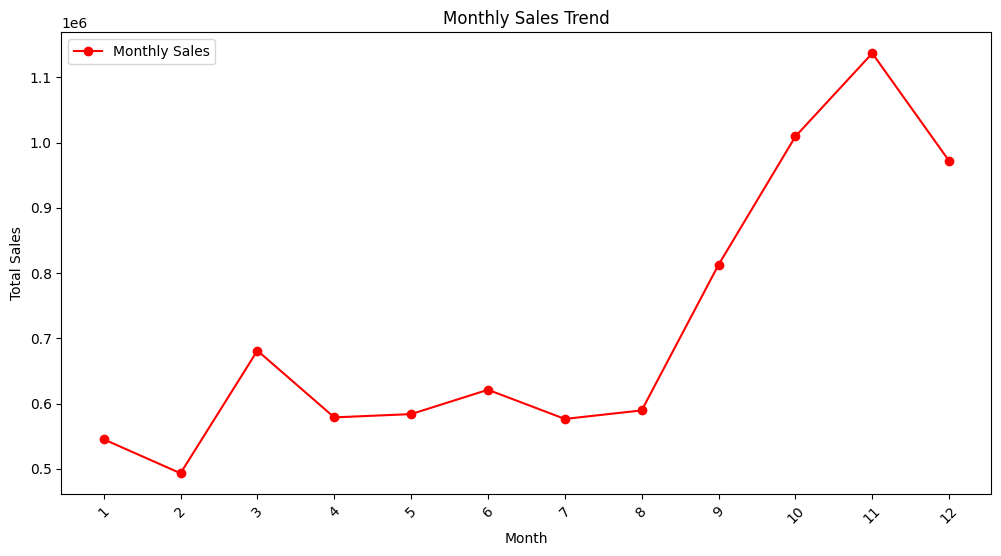

In [197]:
plt.figure(figsize=(12, 6))  
plt.plot(monthly_trends["Month"].astype(str), monthly_trends["Total Spending"], marker="o", label="Monthly Sales", color="red")  
plt.xlabel("Month")  
plt.ylabel("Total Sales")  
plt.title("Monthly Sales Trend")  
plt.xticks(rotation=45)  
plt.legend()  
plt.show() 

In [198]:
daily_sales = df2.groupby(df2["InvoiceDate"].dt.date)["Total Spending"].sum().reset_index()

In [199]:
daily_sales.head()

,InvoiceDate,Total Spending
0,2009-12-01,42821
1,2009-12-02,51589
2,2009-12-03,66272
3,2009-12-04,32981
4,2009-12-05,9627


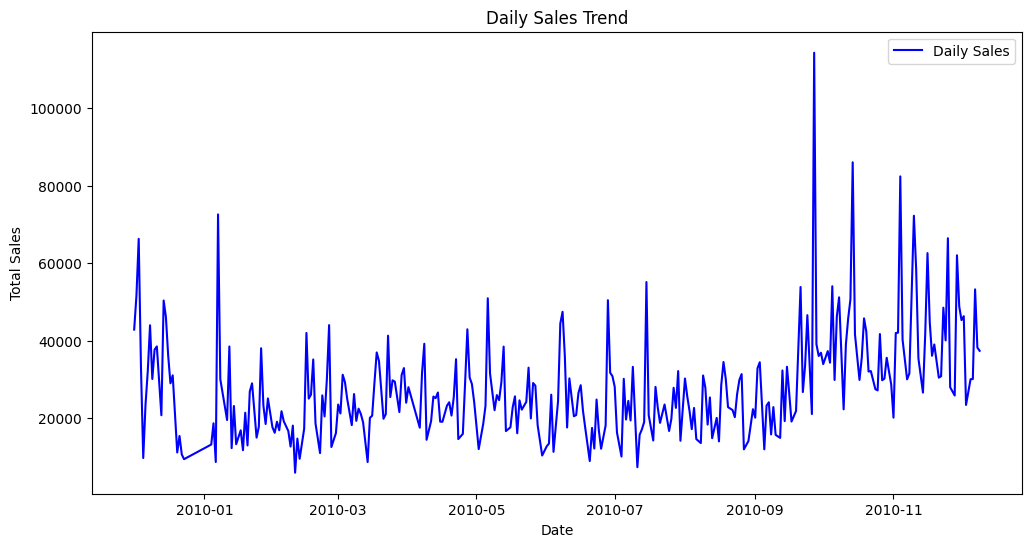

In [200]:
# Plot Daily Sales Trend  
plt.figure(figsize=(12, 6))  
plt.plot(daily_sales["InvoiceDate"], daily_sales["Total Spending"], label="Daily Sales", color="blue")  
plt.xlabel("Date")  
plt.ylabel("Total Sales")  
plt.title("Daily Sales Trend")  
plt.legend()  
plt.show()  

In [201]:
daily_sales['RollingAvg']=daily_sales['Total Spending'].rolling(window=7).mean()

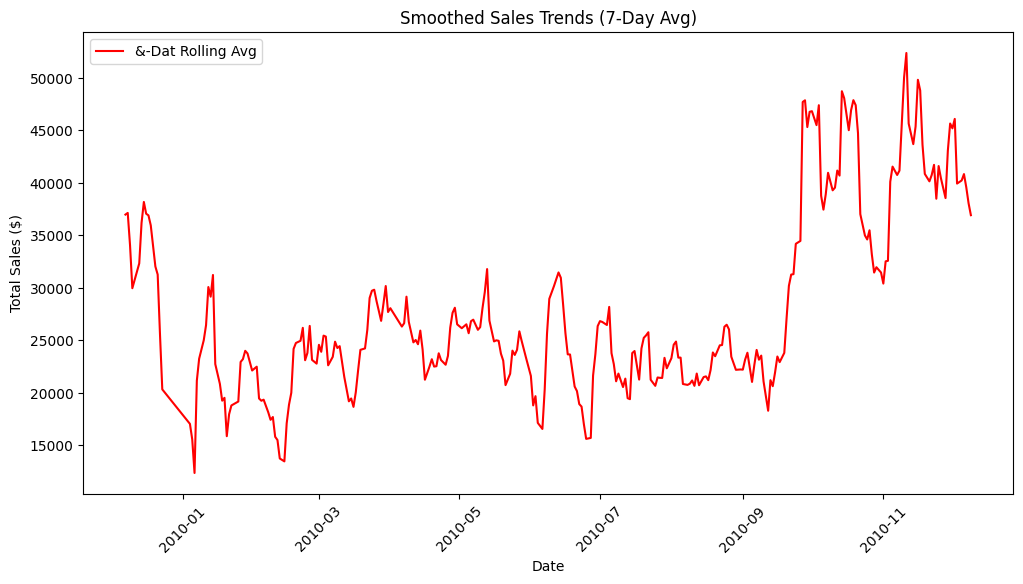

In [202]:
plt.figure(figsize=(12,6))
plt.plot(daily_sales['InvoiceDate'], daily_sales['RollingAvg'], label='&-Dat Rolling Avg', color='red')
plt.xlabel('Date')
plt.ylabel('Total Sales ($)')
plt.title('Smoothed Sales Trends (7-Day Avg)')
plt.xticks(rotation=45)
plt.legend()
plt.show()

In [203]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 400947 entries, 0 to 525460
Data columns (total 10 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   Invoice         400947 non-null  object        
 1   StockCode       400947 non-null  object        
 2   Description     400947 non-null  object        
 3   Quantity        400947 non-null  int64         
 4   InvoiceDate     400947 non-null  datetime64[ns]
 5   Price           400947 non-null  float64       
 6   Customer ID     400947 non-null  float64       
 7   Country         400947 non-null  object        
 8   Total Spending  400947 non-null  int64         
 9   Month           400947 non-null  int32         
dtypes: datetime64[ns](1), float64(2), int32(1), int64(2), object(4)
memory usage: 32.1+ MB


In [205]:
import seaborn as sns
correlation_matrix = df2[['Month', 'Total Spending']].corr()
correlation_matrix

,Month,Total Spending
Month,1.000000,-0.007036
Total Spending,-0.007036,1.000000


In [206]:
correlation_matrix = df2[['Price', 'Total Spending']].corr()
correlation_matrix

,Price,Total Spending
Price,1.000000,0.452057
Total Spending,0.452057,1.000000


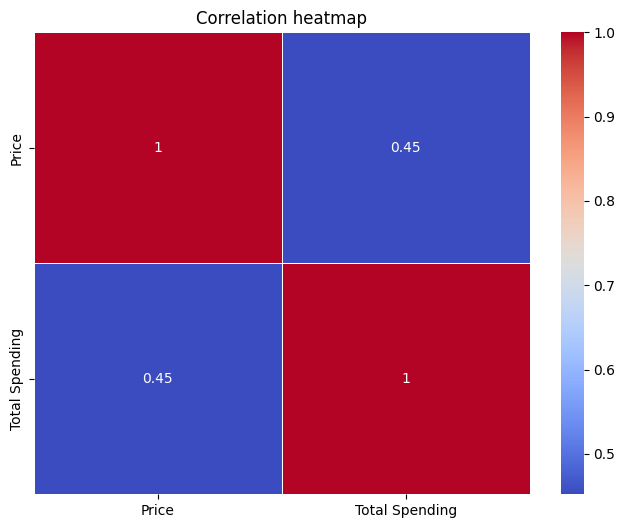

In [207]:
plt.figure(figsize=(8,6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation heatmap")
plt.show()

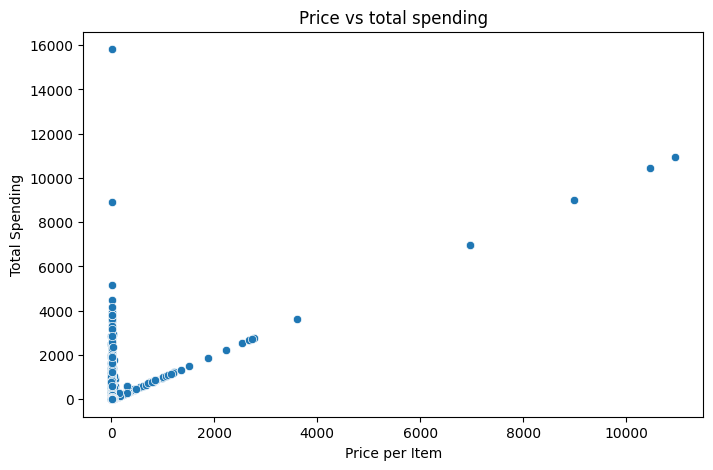

In [208]:
plt.figure(figsize=(8,5))
sns.scatterplot(x=df2['Price'], y=df2['Total Spending'])
plt.title('Price vs total spending')
plt.xlabel('Price per Item')
plt.ylabel('Total Spending')
plt.show()

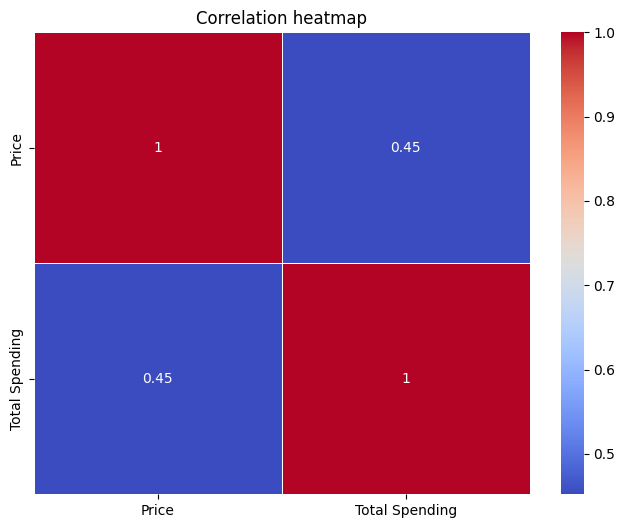

In [209]:
plt.figure(figsize=(8,6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation heatmap")
plt.show()

In [213]:
correlation_matrix = df2[['Price', 'Quantity']].corr()
correlation_matrix

,Price,Quantity
Price,1.000000,-0.006888
Quantity,-0.006888,1.000000
